In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("results.csv")

In [55]:
#df_3x3 = df[df["Name"].str.startswith("grid_{'rows': 3")]
df_3x3 = df[df["Name"].str.startswith("tree_{'levels': 3")]

In [56]:
rf_dim = df_3x3["random_feature_dim"].to_list()
sa_conf = df_3x3["sa_conf"].to_list()
sa_dist_ratio = df_3x3["sa_dist_ratio"].to_list()
test_conf = df_3x3["test_conf"].to_list()
state_dim = df_3x3["state_dim"].to_list()
lr_V = df_3x3["lr_V"].to_list()

In [57]:
def get_val(lr_V, state_dim, metric):
    vals = df_3x3[(df_3x3["lr_V"] == lr_V) & (df_3x3["state_dim"] == state_dim)][metric].tolist()
    return np.mean(vals), np.std(vals)

In [58]:
lr_Vs = [0.02, 0.04, 0.08, 0.1]
state_dims = [20, 100, 200, 1000]

ds1 = {"test_conf": [], "sa_conf": [], "sa_dist_ratio": []}
ss1 = {"test_conf": [], "sa_conf": [], "sa_dist_ratio": []}

for k in ds1.keys():
    for i in range(4):
        d, s = get_val(lr_Vs[i], 20, k)
        ds1[k].append(d)
        ss1[k].append(s)

ds2 = {"test_conf": [], "sa_conf": [], "sa_dist_ratio": []}
ss2 = {"test_conf": [], "sa_conf": [], "sa_dist_ratio": []}

for k in ds2.keys():
    for i in range(4):
        d, s = get_val(0.04, state_dims[i], k)
        ds2[k].append(d)
        ss2[k].append(s)

(0.25, 0.75)

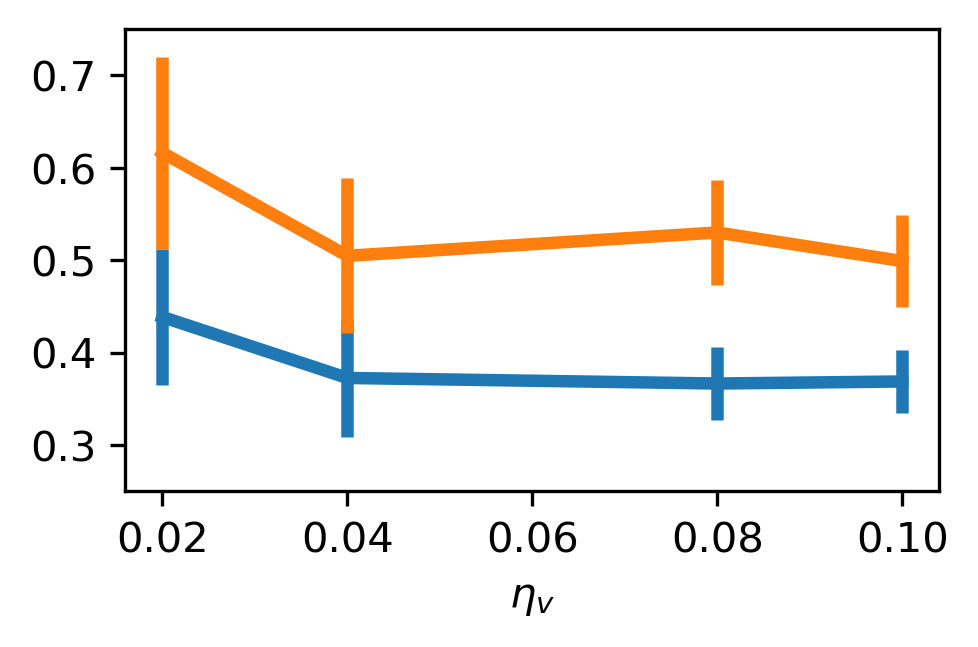

In [62]:
# plt.figure(figsize=(3.5, 2), dpi=300)
# plt.plot(rf_dims, d1[:, 2, 1], label="Test confidence", linewidth=3)
# plt.plot(rf_dims, d2[:, 2, 1], label="State-action confidence", linewidth=3)
# plt.xlabel("Random feature dimension")
# #plt.legend()

plt.figure(figsize=(3.5, 2), dpi=300)
plt.errorbar(lr_Vs, ds1["test_conf"], ss1["test_conf"], label="Test confidence", linewidth=3)
plt.errorbar(lr_Vs, ds1["sa_conf"], ss1["sa_conf"], label="State-action confidence", linewidth=3)
plt.xlabel("$\\eta_v$")
plt.ylim([0.25, 0.75])
#plt.legend()

(0.25, 0.75)

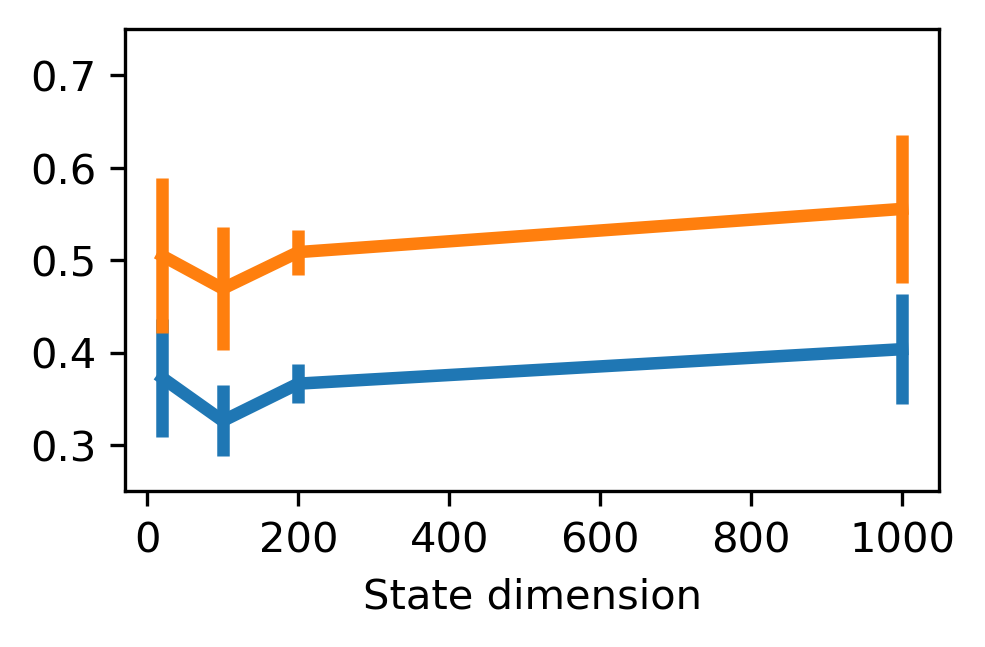

In [63]:
plt.figure(figsize=(3.5, 2), dpi=300)
plt.errorbar(state_dims, ds2["test_conf"], ss2["test_conf"], label="Test confidence", linewidth=3)
plt.errorbar(state_dims, ds2["sa_conf"], ss2["sa_conf"], label="State-action confidence", linewidth=3)
plt.xlabel("State dimension")
plt.ylim([0.25, 0.75])
#plt.ylim([0.6, 0.85])
#plt.legend()

(0.35, 0.8)

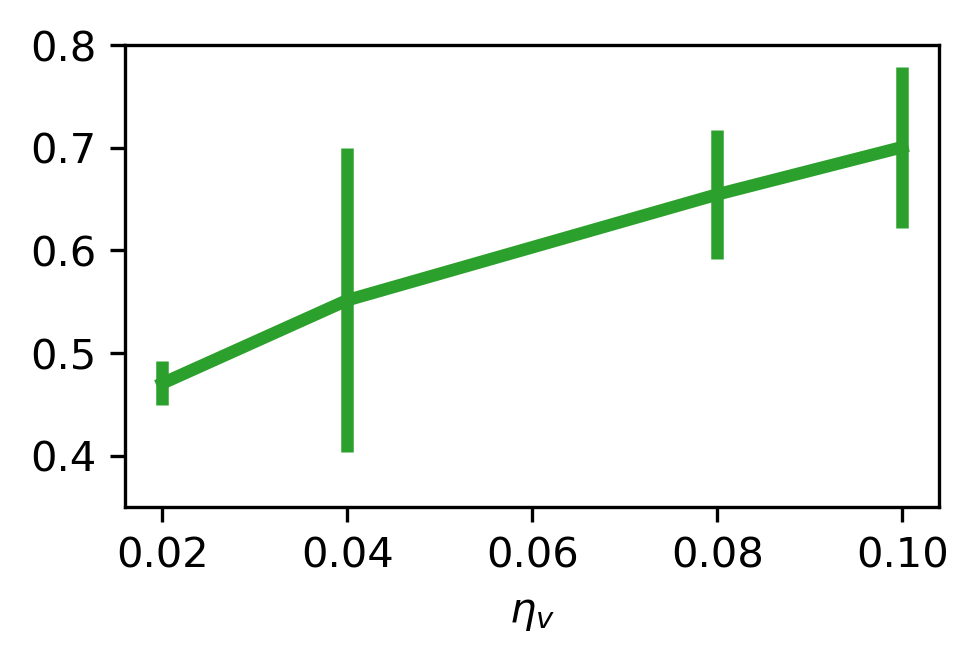

In [67]:
plt.figure(figsize=(3.5, 2), dpi=300)
plt.errorbar(lr_Vs, ds1["sa_dist_ratio"], ss1["sa_dist_ratio"], label="Test confidence", linewidth=3, c="tab:green")
plt.xlabel("$\\eta_v$")
#plt.ylim([0, 0.3])
plt.ylim([0.35, 0.8])
#plt.legend()

(0.35, 0.8)

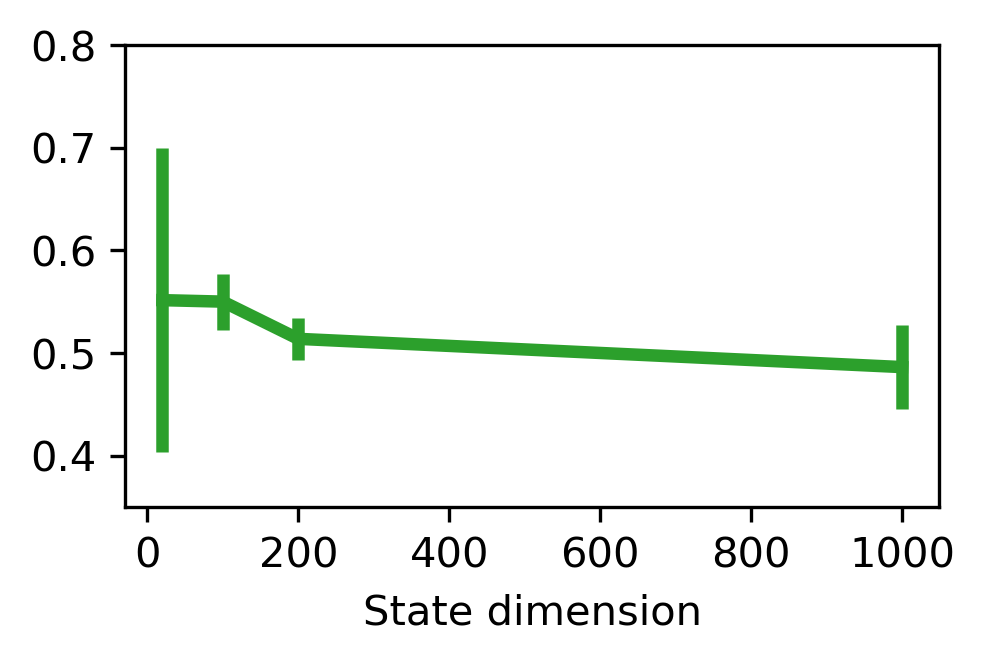

In [68]:
plt.figure(figsize=(3.5, 2), dpi=300)
plt.errorbar(state_dims, ds2["sa_dist_ratio"], ss2["sa_dist_ratio"], label="Test confidence", linewidth=3, c="tab:green")
plt.xlabel("State dimension")
#plt.ylim([0, 0.3])
#plt.ylim([0, 0.3])
plt.ylim([0.35, 0.8])
#plt.legend()